In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [13]:
path=r'F:/python/OpenCV/Datas/train/'

In [14]:
Nude=os.listdir(path+'Nude/')
Decent=os.listdir(path+'Not Nude/')
test_path='F:/python/OpenCV/Datas/test/'
test=os.listdir(test_path)

In [15]:
vgg16 = tf.keras.applications.VGG16(include_top=False)
preprocess_input = tf.keras.applications.vgg16.preprocess_input
image = tf.keras.preprocessing.image

In [16]:
batch_size=20

In [17]:
def extract_features(img_paths, batch_size=batch_size):

    global vgg16
    n = len(img_paths)
    img_array = np.zeros((n, 299, 299, 3))
    
    for i, path in enumerate(img_paths):
        img = image.load_img(path, target_size=(299, 299))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        x = preprocess_input(img)
        img_array[i] = x
    
    X = vgg16.predict(img_array, batch_size=batch_size, verbose=1)
    X = X.reshape(n, 512, -1)
    return X

In [18]:
X = extract_features(
    list(map(lambda x: path + 'Nude/' + x, Nude)) + list(map(lambda x: path + 'Not Nude/' + x, Decent))
) 
y = np.array([1] * len(Nude) + [0] * len(Decent))

5/5 [==============================] - 85s 14s/step


In [19]:
X_test = extract_features(
    list(map(lambda x: test_path + x, test))
)
y_test = np.array([1] * len(Nude) + [0] * len(Decent))

1/1 [==============================] - 14s 14s/step


In [20]:
#Training

In [21]:
def train():
    model = tf.keras.models.Sequential([ 
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1724, activation=tf.nn.relu),


      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)

    ])
    return model

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Dense
np.random.seed(42)

epochs = 10

model = train()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test,y_test),
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/10
4/4 [==============================] - 7s 1s/step - loss: 1.3694 - accuracy: 0.8657 - val_loss: 2.4059e-31 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 2s 600ms/step - loss: 1.0723e-25 - accuracy: 1.0000 - val_loss: 1.2747e-19 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 2s 521ms/step - loss: 4.8579e-15 - accuracy: 1.0000 - val_loss: 4.2313e-10 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 2s 515ms/step - loss: 7.4442e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 2s 527ms/step - loss: 3.5562e-37 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 2s 498ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 2s 508ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.000

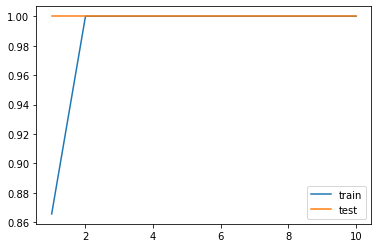

In [25]:
plt.plot(range(1,epochs+1), history.history['accuracy'], label='train')
plt.plot(range(1,epochs+1), history.history['val_accuracy'], label='test')
plt.legend()

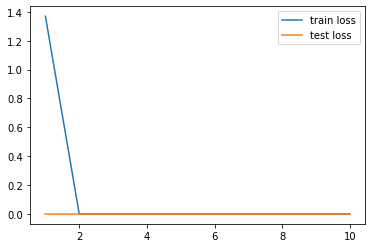

In [26]:
plt.plot(range(1,epochs+1), history.history['loss'], label='train loss')
plt.plot(range(1,epochs+1), history.history['val_loss'], label='test loss')
plt.legend()